In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import plotly.express as px

In [ ]:
deals = pd.read_excel('new_Deals.xlsx')

**Examine the distribution of payment types and their impact on deal success.**

In [ ]:
# grouping by payment types
payment_type_deals = deals[deals['Payment Type'] != 'Unknown']['Payment Type'].value_counts()
payment_type_deals

,count
Payment Type,
Recurring Payments,350
One Payment,141
Reservation,5


In [ ]:
# Filtering successful transactions (Payment Done)
successful_deals = deals[deals['Stage'] == 'Payment Done']

In [ ]:
successful_deals

,Id,Deal Owner Name,Closing Date,Quality,Stage,Lost Reason,Page,Campaign,SLA,Content,...,Education Type,Created Time,Course duration,Months of study,Initial Amount Paid,Offer Total Amount,Contact Name,City,Level of Deutsch,Campaign Date
468,5805028000055502848,Eva Kent,2024-06-18,B - Medium,Payment Done,Unknown,/pl-eng/web-developer,performancemax_wide_AT,0.607870,_{region_name}_,...,Evening,2024-06-15 20:01:00,11.0,1.0,500.0,4500.0,5805028000055471104,Podskalie,Unknown,NaT
478,5805028000055524352,Ben Hall,2024-06-19,A - High,Payment Done,Unknown,/eng,wide_DE,0.012095,bloggersvideo11,...,Evening,2024-06-15 17:02:00,11.0,1.0,500.0,4500.0,5805028000055502848,Zinnowitz,Unknown,NaT
497,5805028000055524352,Ben Hall,NaT,B - Medium,Payment Done,Unknown,/eng,Live_DE,0.016458,b0,...,Morning,2024-06-15 12:20:00,6.0,1.0,1000.0,9000.0,5805028000055463936,Wolfsburg,B1,NaT
833,5805028000054664192,Ben Hall,NaT,D - Non Target,Payment Done,Unknown,/eng,Unknown,0.688796,Unknown,...,Morning,2024-06-11 19:39:00,6.0,1.0,1000.0,9000.0,5805028000054683648,Zwickau,A2,NaT
1040,5805028000054256640,Quincy Vincent,2024-06-17,B - Medium,Payment Done,Unknown,/eng,wide_DE,0.031887,bloggersvideo16com,...,Morning,2024-06-10 15:33:00,11.0,1.0,1000.0,11000.0,5805028000054284288,Leinfelden-Echterdingen,B1,2023-07-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21312,5805028000002301952,Julia Nelson,2023-07-19,C - Low,Payment Done,Expensive,eng/digital-marketing,performancemax_digitalmarkt_ru_DE,0.642269,_{region_name}_,...,Morning,2023-07-18 21:11:00,6.0,2.0,1000.0,5000.0,5805028000002301952,Wolfsburg,b1,NaT
21364,5805028000001987584,Julia Nelson,2023-07-17,C - Low,Payment Done,Conditions are not suitable,eng/digital-marketing,wide_DE,0.034213,v3com,...,Morning,2023-07-17 18:02:00,11.0,11.0,1000.0,11000.0,5805028000001985536,Unknown,b1 должна получить результаты в феврале,NaT
21407,5805028000001885184,Jane Smith,2023-08-31,A - High,Payment Done,Unknown,eng/digital-marketing,recentlymoved_DE,0.009387,b2,...,Morning,2023-07-15 13:27:00,11.0,11.0,450.0,4000.0,5805028000001880064,Ingolstadt,Unknown,2023-07-04
21552,5805028000001400832,Oliver Taylor,NaT,B - Medium,Payment Done,Unknown,eng/digital-marketing,wide_DE,0.099028,b3,...,Unknown,2023-07-08 08:56:00,11.0,8.0,1000.0,11500.0,5805028000001350656,Unknown,Unknown,2023-07-02


In [ ]:
# Grouping by payment types
payment_type_success = successful_deals[successful_deals['Payment Type'] != 'Unknown']['Payment Type'].value_counts()
payment_type_success

,count
Payment Type,
Recurring Payments,250
One Payment,113
Reservation,1


In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]],
                    subplot_titles=("Distribution of payment types", "Distribution of payment types per successful deals"),
                    horizontal_spacing=0.2)

fig1 = px.pie(names=payment_type_deals.index, values=payment_type_deals.values)
fig2 = px.pie(names=payment_type_success.index, values=payment_type_success.values)

fig.add_trace(fig1.data[0], row=1, col=1)
fig.add_trace(fig2.data[0], row=1, col=2)

fig.update_layout(title_text="Payment Analysis", height=600, width=1000)

fig.show()

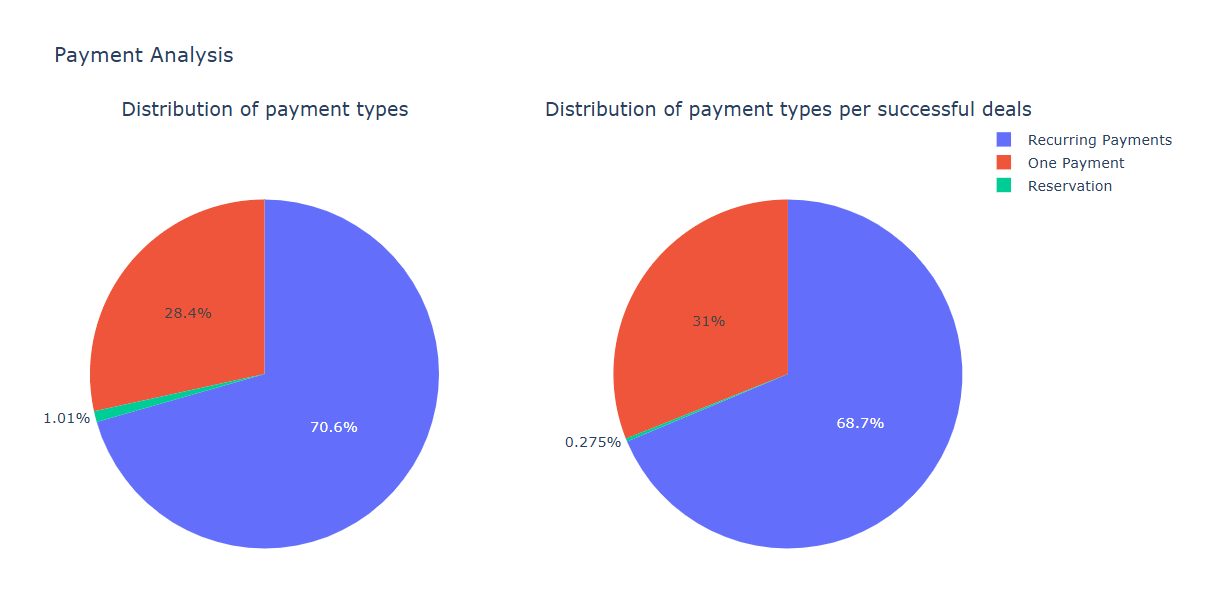

This visualization shows that payment types are almost equally related to the total number of deals and to successful deals.

**Analyze the popularity and success of different products and types of training.**

In [ ]:
# we count the total number of products and the number of successful transactions
product_popularity = deals.groupby('Product').apply(lambda x: pd.Series({
    'Total Deals': x['Id'].count(),
    'Successful Deals': (x['Stage'] == 'Payment Done').sum(),
}))
product_popularity

,Total Deals,Successful Deals
Product,,
Data Analytics,1,0
Digital Marketing,1990,474
Find yourself in IT,4,1
UX/UI Design,1022,229
Unknown,17998,17
Web Developer,575,137


In [ ]:
# we count the total number and the number of successful transactions by products and by types of training
product_type_popularity = deals.groupby(['Product', 'Education Type']).apply(lambda x: pd.Series({
    'Total Deals': x['Id'].count(),
    'Successful Deals': (x['Stage'] == 'Payment Done').sum(),
})).reset_index()
product_type_popularity

,Product,Education Type,Total Deals,Successful Deals
0,Data Analytics,Unknown,1,0
1,Digital Marketing,Evening,250,113
2,Digital Marketing,Morning,1533,354
3,Digital Marketing,Unknown,207,7
4,Find yourself in IT,Unknown,4,1
5,UX/UI Design,Evening,153,58
6,UX/UI Design,Morning,808,171
7,UX/UI Design,Unknown,61,0
8,Unknown,Morning,9,0
9,Unknown,Unknown,17989,17


# Preliminary schedule

для анализу исключим данные по продуктам и типам обучения, которые Unknown

In [ ]:
filtered_deals = deals[(deals['Product'] != 'Unknown')]

product_type_popularity_graf = filtered_deals.groupby(['Product', 'Education Type']).apply(lambda x: pd.Series({
    'Total Deals': x['Id'].count(),
    'Successful Deals': (x['Stage'] == 'Payment Done').sum(),
})).reset_index()

product_type_popularity_graf

,Product,Education Type,Total Deals,Successful Deals
0,Data Analytics,Unknown,1,0
1,Digital Marketing,Evening,250,113
2,Digital Marketing,Morning,1533,354
3,Digital Marketing,Unknown,207,7
4,Find yourself in IT,Unknown,4,1
5,UX/UI Design,Evening,153,58
6,UX/UI Design,Morning,808,171
7,UX/UI Design,Unknown,61,0
8,Web Developer,Evening,1,0
9,Web Developer,Morning,545,137


In [ ]:
# посчитаем разницу между общим количеством сделок и успешными сделками (для визуалзации)
product_type_popularity_graf['Difference'] = product_type_popularity_graf['Total Deals'] - product_type_popularity_graf['Successful Deals']

product_type_popularity_graf

,Product,Education Type,Total Deals,Successful Deals,Difference
0,Data Analytics,Unknown,1,0,1
1,Digital Marketing,Evening,250,113,137
2,Digital Marketing,Morning,1533,354,1179
3,Digital Marketing,Unknown,207,7,200
4,Find yourself in IT,Unknown,4,1,3
5,UX/UI Design,Evening,153,58,95
6,UX/UI Design,Morning,808,171,637
7,UX/UI Design,Unknown,61,0,61
8,Web Developer,Evening,1,0,1
9,Web Developer,Morning,545,137,408


In [ ]:
fig = px.bar(product_type_popularity_graf,
             x='Product',
             y=['Difference', 'Successful Deals'],
             color='Education Type',
             barmode='group',
             title='Total and Successful Deals by Product and Education Type')

fig.show()

# Final schedule

for the analysis we will exclude data on products and types of training that are Unknown


In [ ]:
filtered_deals = deals[(deals['Product'] != 'Unknown') & (deals['Education Type'] != 'Unknown')]

product_type_popularity_graf = filtered_deals.groupby(['Product', 'Education Type']).apply(lambda x: pd.Series({
    'Total Deals': x['Id'].count(),
    'Successful Deals': (x['Stage'] == 'Payment Done').sum(),
})).reset_index()

product_type_popularity_graf

,Product,Education Type,Total Deals,Successful Deals
0,Digital Marketing,Evening,250,113
1,Digital Marketing,Morning,1533,354
2,UX/UI Design,Evening,153,58
3,UX/UI Design,Morning,808,171
4,Web Developer,Evening,1,0
5,Web Developer,Morning,545,137


In [ ]:
# Let's calculate the difference between the total number of transactions and successful transactions (for visualization)
product_type_popularity_graf['Difference'] = product_type_popularity_graf['Total Deals'] - product_type_popularity_graf['Successful Deals']

product_type_popularity_graf

,Product,Education Type,Total Deals,Successful Deals,Difference
0,Digital Marketing,Evening,250,113,137
1,Digital Marketing,Morning,1533,354,1179
2,UX/UI Design,Evening,153,58,95
3,UX/UI Design,Morning,808,171,637
4,Web Developer,Evening,1,0,1
5,Web Developer,Morning,545,137,408


In [ ]:
fig = px.bar(product_type_popularity_graf,
             x='Product',
             y=['Difference', 'Successful Deals'],
             color='Education Type',
             barmode='group',
             title='Total and Successful Deals by Product and Education Type')

fig.show()

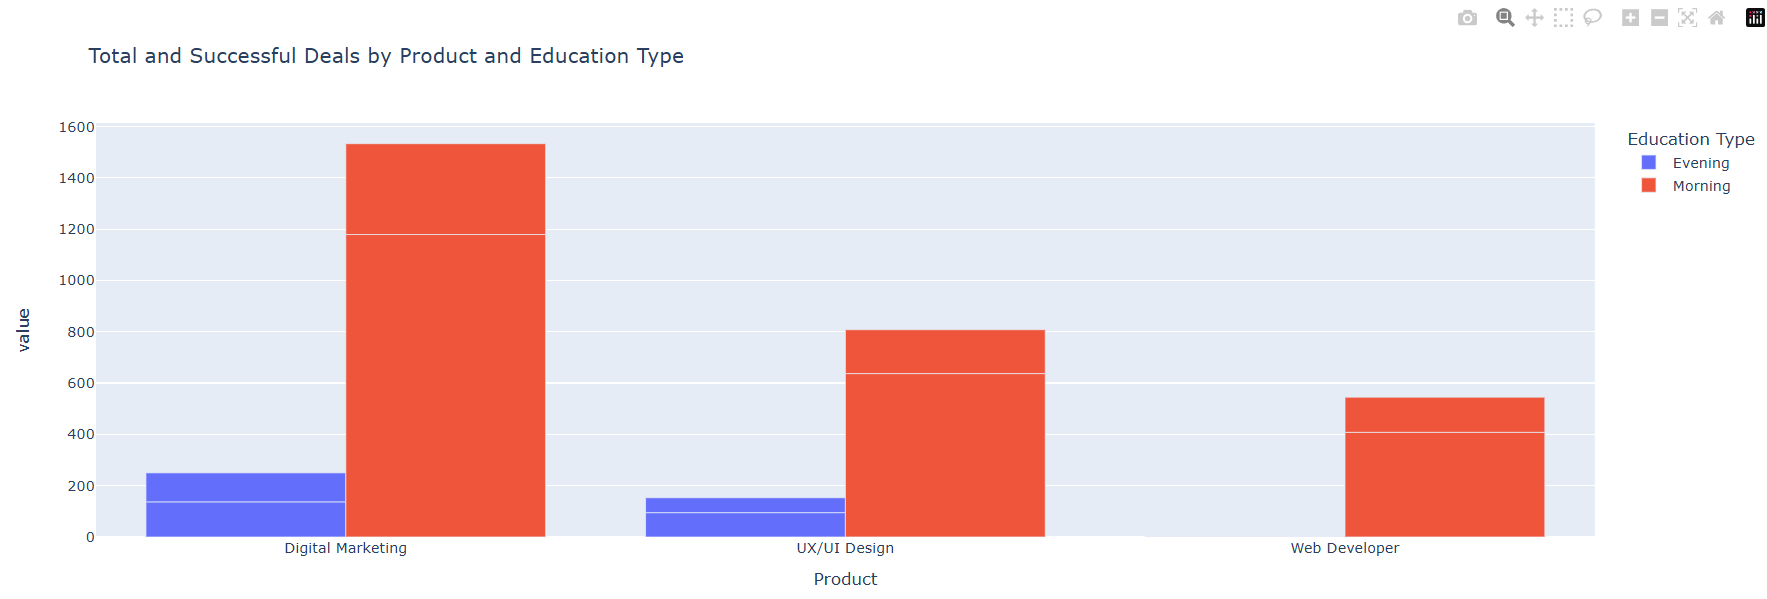

The top line of the bar is the total number of transactions for each product. The line in the middle divides the bar into successful transactions and all others. At the top are successful transactions where the payment was completed.

So the higher the bar below the line, the more successful transactions, and the greater the distance between the line and the top of the bar, the more failed transactions.

Digital Marketing is the most popular product, especially for training in the morning. Evening courses for this product are also quite popular, but significantly less than morning ones.

UX/UI Design is the second most popular product, and again, morning courses attract more students than evening ones.

Web Developer is the least popular product among all presented, but morning courses also attract more people compared to evening ones.

The trend is noticeable everywhere: morning courses are more popular than evening ones, regardless of the product. Thus, morning courses are the main choice for most products, with Digital Marketing attracting the largest number of students.

